In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
patient_dev = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev.csv')
patient_dev_os = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_os.csv')
patient_dev_us = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_us.csv')
patient_dev_smote = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_smote.csv')
patient_test = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/test.csv')

In [3]:
patient_X_dev = patient_dev.drop(columns=['hospital_death'])
patient_y_dev = pd.DataFrame(patient_dev['hospital_death'], index = patient_dev.index)

patient_X_dev_os = patient_dev_os.drop(columns=['hospital_death'])
patient_y_dev_os = pd.DataFrame(patient_dev_os['hospital_death'], index = patient_dev_os.index)

patient_X_dev_us = patient_dev_us.drop(columns=['hospital_death'])
patient_y_dev_us = pd.DataFrame(patient_dev_us['hospital_death'], index = patient_dev_us.index)

patient_X_dev_smote = patient_dev_smote.drop(columns=['hospital_death'])
patient_y_dev_smote = pd.DataFrame(patient_dev_smote['hospital_death'], index = patient_dev_smote.index)

patient_X_test = patient_test.drop(columns=['hospital_death'])
patient_y_test = pd.DataFrame(patient_test['hospital_death'], index = patient_test.index)

* Standardize the dataset

In [4]:
scaler = StandardScaler()
patient_X_dev = pd.DataFrame(scaler.fit_transform(patient_X_dev), columns = patient_X_dev.columns, index = patient_X_dev.index)
patient_X_test = pd.DataFrame(scaler.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_os = pd.DataFrame(scaler.fit_transform(patient_X_dev_os), columns = patient_X_dev_os.columns, index = patient_X_dev_os.index)
patient_X_test = pd.DataFrame(scaler.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_us = pd.DataFrame(scaler.fit_transform(patient_X_dev_us), columns = patient_X_dev_us.columns, index = patient_X_dev_us.index)
patient_X_test = pd.DataFrame(scaler.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_smote = pd.DataFrame(scaler.fit_transform(patient_X_dev_smote), columns = patient_X_dev_smote.columns, index = patient_X_dev_smote.index)
patient_X_test = pd.DataFrame(scaler.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)


* Plot out the graph to see 95% cut of explained variance and choose 46 as the number of component.
* Plot out the graph to see 99% cut of explained variance and choose 57 as the number of component.

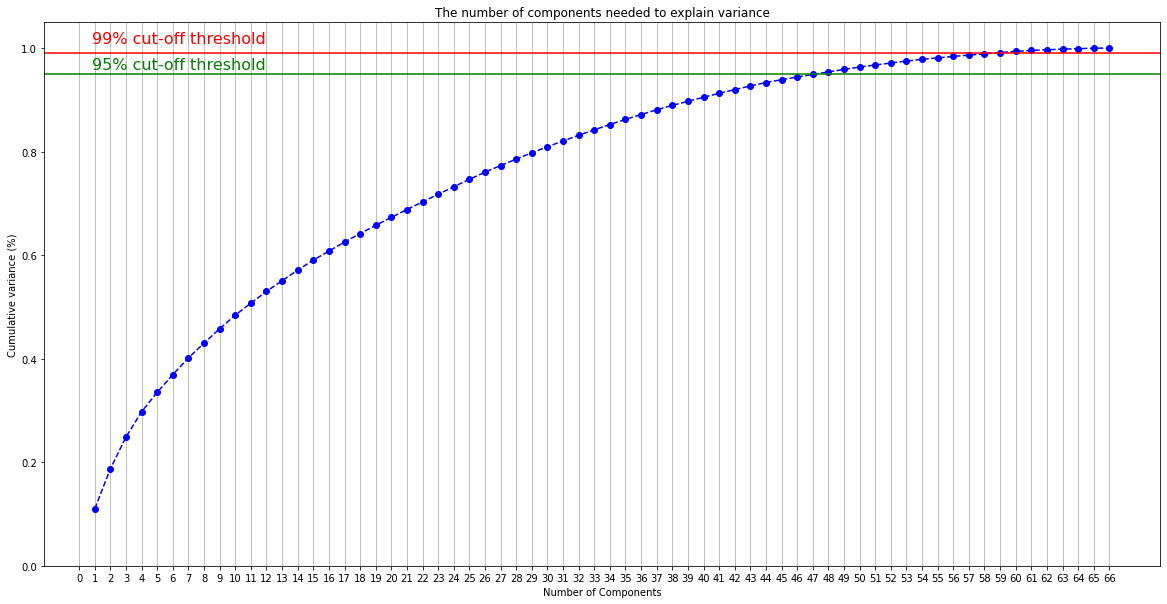

In [5]:
pca = PCA().fit(patient_X_dev)
xi = np.arange(1, 67, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.ylim(0,1.05)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 67, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='g', linestyle='-')
plt.text(0.8, 0.96, '95% cut-off threshold', color = 'green', fontsize=16)

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.8, 1.01, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

* Apply 95% PCA to all the datasets

In [6]:
pca_95 = PCA(n_components = 0.95)

pd.DataFrame(pca.fit_transform(patient_X_dev_smote), columns = patient_X_dev_smote.columns, index = patient_X_dev_smote.index)

patient_X_dev_pca95 = pd.DataFrame(pca.fit_transform(patient_X_dev), columns = patient_X_dev.columns, index = patient_X_dev.index)
patient_X_test_pca95 = pd.DataFrame(pca.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)


patient_X_dev_os_pca95 = pd.DataFrame(pca.fit_transform(patient_X_dev_os), columns = patient_X_dev_os.columns, index = patient_X_dev_os.index)
patient_X_test_os_pca95 = pd.DataFrame(pca.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_us_pca95 = pd.DataFrame(pca.fit_transform(patient_X_dev_us), columns = patient_X_dev_us.columns, index = patient_X_dev_us.index)
patient_X_test_us_pca95 = pd.DataFrame(pca.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_smote_pca95 = pd.DataFrame(pca.fit_transform(patient_X_dev_smote), columns = patient_X_dev_smote.columns, index = patient_X_dev_smote.index)
patient_X_test_smote_pca95 = pd.DataFrame(pca.fit_transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)


* Generate new Dataset with PCA

In [7]:
# Development set
patient_dev_pca95 = patient_X_dev_pca95.copy()
patient_dev_pca95['hospital_death'] = patient_y_dev
patient_dev_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/dev_pca95.csv', index = False)

patient_dev_os_pca95 = patient_X_dev_os_pca95.copy()
patient_dev_os_pca95['hospital_death'] = patient_y_dev
patient_test.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/dev_os_pca95.csv', index = False)

patient_dev_us_pca95 = patient_X_dev_us_pca95.copy()
patient_dev_us_pca95['hospital_death'] = patient_y_dev
patient_dev_us_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/dev_us_pca95.csv', index = False)

patient_dev_smote_pca95 = patient_X_dev_smote_pca95.copy()
patient_dev_smote_pca95['hospital_death'] = patient_y_dev
patient_dev_smote_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/dev_smote_pca95.csv', index = False)

# Test set
patient_test_pca95 = patient_X_test_pca95.copy()
patient_test_pca95['hospital_death'] = patient_y_test
patient_test_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/test_pca95.csv', index = False)

patient_test_os_pca95 = patient_X_test_os_pca95.copy()
patient_test_os_pca95['hospital_death'] = patient_y_test
patient_test_os_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/test_os_pca95.csv', index = False)

patient_test_us_pca95 = patient_X_test_us_pca95.copy()
patient_test_us_pca95['hospital_death'] = patient_y_test
patient_test_us_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/test_us_pca95.csv', index = False)

patient_test_smote_pca95 = patient_X_test_smote_pca95.copy()
patient_test_smote_pca95['hospital_death'] = patient_y_test
patient_test_smote_pca95.to_csv('/Users/alexzhou/Desktop/Fall 2022/Applied_ML/AML_project/Data/test_smote_pca95.csv', index = False)
